# **Importing essential libraries**

In [51]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

# **Loading the dataset**

In [52]:
df = pd.read_csv('../Datasets/diabetes.csv')

In [53]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Data Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f815964f110>,
      dtype=object)

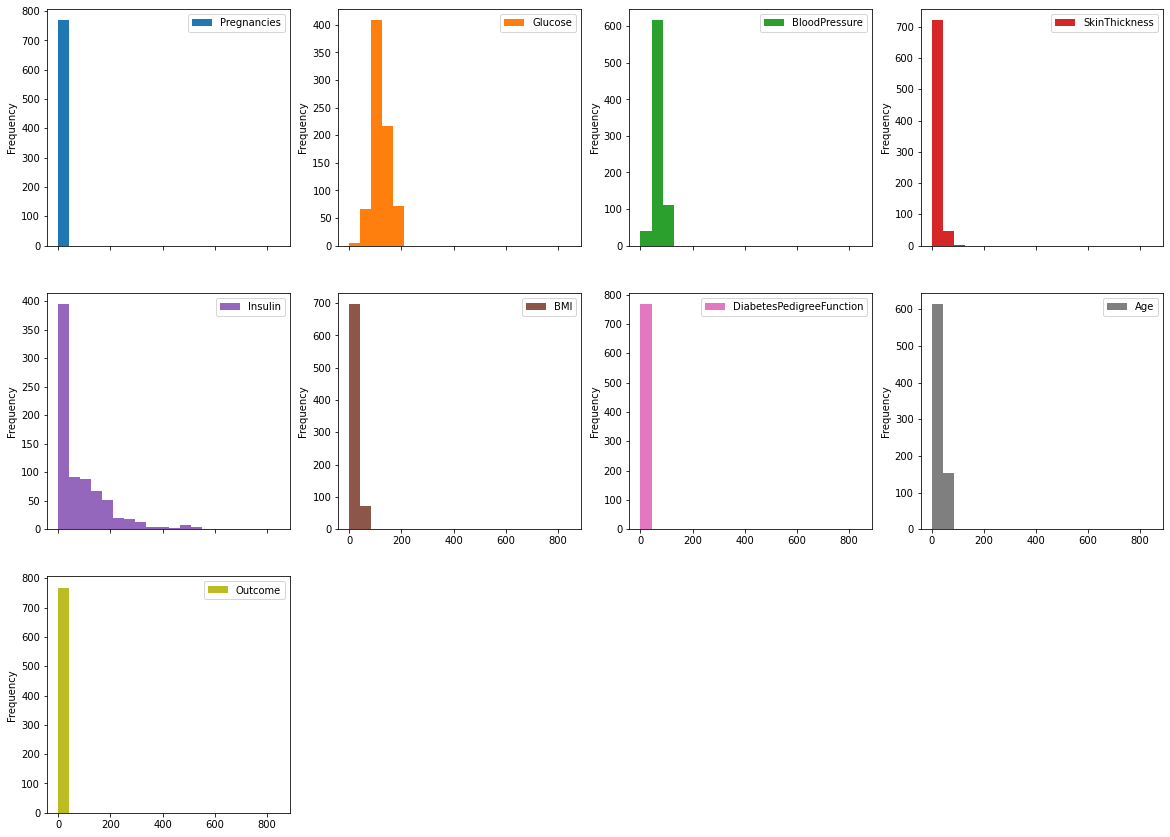

In [54]:
df.plot.hist(subplots=True, layout=(4,4), figsize=(20, 20), bins=20)

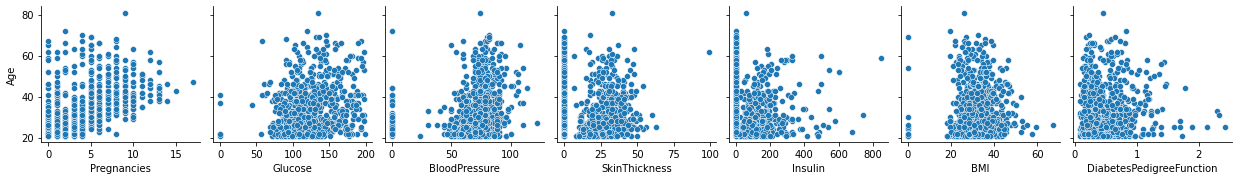

In [55]:
sns.pairplot(
    df,
    x_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'],
    y_vars=['Age'],
)

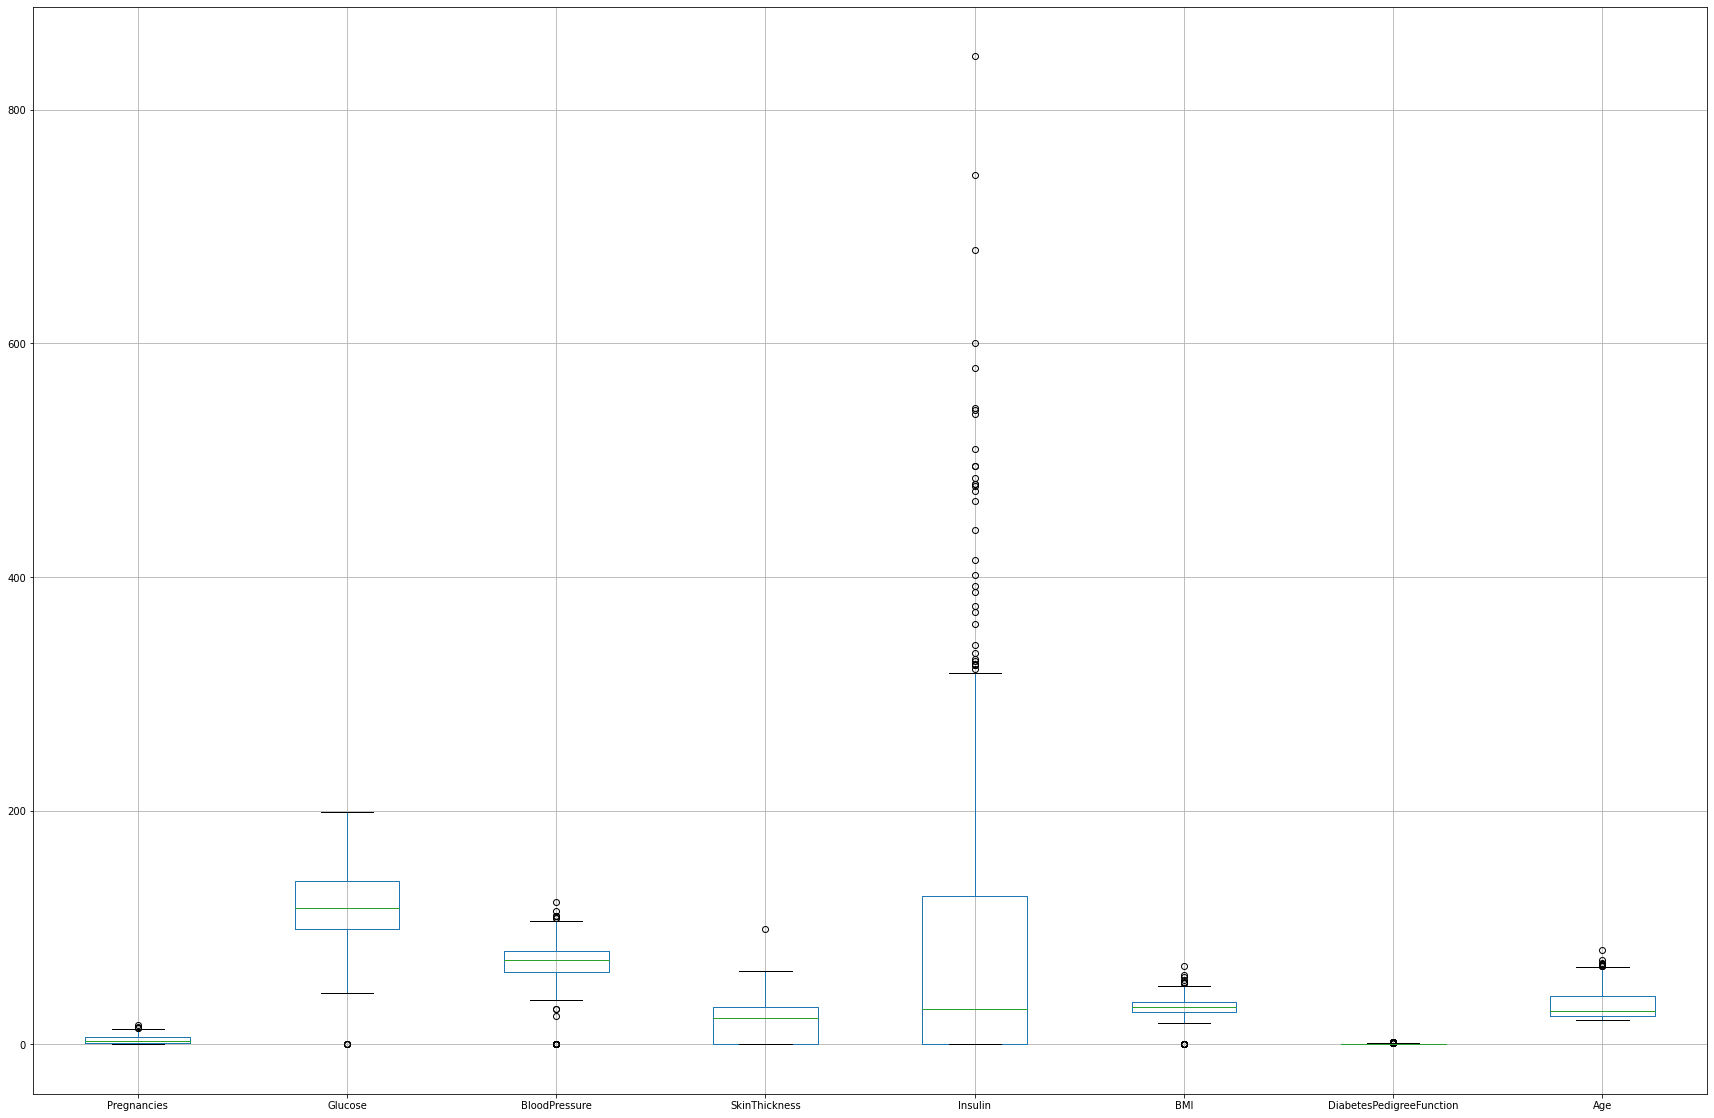

In [56]:
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'], figsize=(30,20))

# **Data Preprocessing**

In [57]:
# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

In [58]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [59]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

# **Random Forest Classifier Model**

In [73]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [81]:
# Training the model on Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50,random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [82]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [63]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


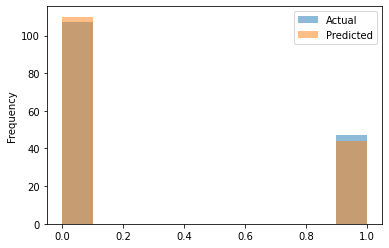

In [64]:
df2.plot.hist(alpha=0.5)

# **Evaluation Metrics**

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

Confusion Matrix: [[94 13]
 [18 29]]
Accuracy: 0.7987012987012987


In [66]:
from sklearn import metrics
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 0.44866323818505716
Mean Absolute Error (MAE): 0.2012987012987013
Mean Squared Error (MSE): 0.2012987012987013
